### Entrenamiento de los modelos lineales

Ahora vamos a estudiar en más detalles el proceso de entrenamiento de un modelo.

Usaremos regresión lineal para comenzar, ya que es muy simple.

Después vamos a ver sobre regresión polinomial, regresión logística y regresión *softmax*

#### Regresión lineal

Un modelo lineal tiene la siguiente forma matemática:

$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$$

* $\hat{y}$ es el valor predicho por el modelo
* $n$ es el número de *features*
* $x_i$ es el valor del $i$-esima *feature*
* $\theta_j$ es el $j$-esima parámetro del modelo

En forma vectorial:

$$\hat{y} = h_{\boldsymbol{\theta}} = \boldsymbol{\theta} \cdot \boldsymbol{x}$$

* $\boldsymbol{\theta}$: vector de parámetros.
* $\boldsymbol{x}$: vector de *features* para una instancia, donde $x_0 = 1$ siempre.
* $h_{\mathbf{\theta}}$

¿Cómo se puede entrenar el modelo?

Tenemos que encontrar el valor de $\boldsymbol{\theta}$ que corresponde al mejor ajuste del modelo a los datos.

¿Cómo sabemos cuál es el mejor ajuste?

Ocupamos una medición de lo bueno (o malo) que es el modelo. En el caso de regresión, es muy común usar el **raiz del error cuadrático medio** (RMSE).

Entonces, entrenamiento del modelo corresponde a encontrar el valor de $\boldsymbol{\theta}$ que minimiza el RMSE (de hecho, es más fácil minimizar el error cuadrático medio).

MSE función de costo para un modelo de regresión lineal:

$$\text{MSE}(\boldsymbol{X},h_{\boldsymbol{\theta}}) = \frac{1}{m} \sum_{i=1}^m \left( \boldsymbol{\theta}^T \boldsymbol{x}^{(i)} - y^{(i)} \right)^2$$

El conjunto de entrenamiento está indicado con $\boldsymbol{X}$, y $m$ es el número de instancias en este conjunto.

#### La ecuación normal

Hay una solución analítica a este problema de optimización.

$$\hat{\boldsymbol{\theta}} = \left( \boldsymbol{X}^T \boldsymbol{X} \right)^{-1} \boldsymbol{X}^T \boldsymbol{y}$$

* $\hat{\boldsymbol{\theta}}$ es el valor de $\boldsymbol{\theta}$
* $\boldsymbol{y} = (y^{(1)},\ldots,y^{(m)})$ es el vector de valores de *target* (*ground truth*)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
X = 2 * random.rand(100, 1)
y = 4 + 3 * X + random.randn(100, 1)

Text(0, 0.5, '$y$')

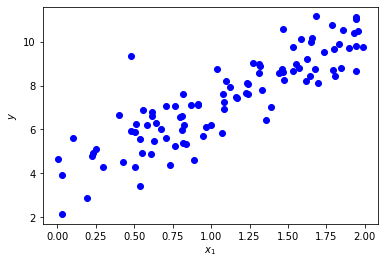

In [34]:
plot(X,y,'bo')
xlabel("$x_1$")
ylabel("$y$")

Ahora podemos calcular la solución a la ecuación normal, usando la función `inv()` del módulo de algebra lineal de NumPy (`np.linalg`).

In [35]:
X_b = c_[ones((100, 1)), X] # agregar x0 = 1 a cada instancia.
theta_ajuste = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

La función que genera los datos es $y = 4 + 3x_1 + \text{ruido}$. El resultado del ajuste con regresión lineal es:

In [36]:
theta_ajuste

array([[3.86600557],
       [3.22025966]])

Los parámetros exactos son $\theta_0 = 4$, $\theta_1 = 3$. Es imposible recuperar los parámetros por el ruido aleatorio agregado a los datos.

Ahora podemos predecir nuevos valores usando $\boldsymbol{\theta}$.

In [37]:
X_nuevo = array([[0], [2]])
X_nuevo_b = c_[ones((2, 1)), X_nuevo] # agregar x0 = 1 a cada instancia.
y_prediccion = X_nuevo_b.dot(theta_ajuste)
y_prediccion

array([[ 3.86600557],
       [10.30652488]])

Text(0, 0.5, '$y$')

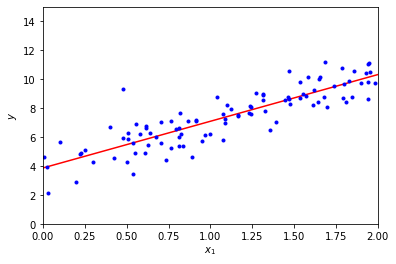

In [38]:
axis([0,2,0,15])
plot(X_nuevo, y_prediccion, "r-")
plot(X, y, "b.")
xlabel("$x_1$")
ylabel("$y$")

Ahora podemos aplicar el modelo de regresión lineal con `scikit-learn`

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86600557]), array([[3.22025966]]))

In [40]:
lin_reg.predict(X_nuevo)

array([[ 3.86600557],
       [10.30652488]])

La clase de `LinearRegression` está basada en `scipy.linalg.lstsq()`.

In [41]:
theta_ajuste_svd, residuos, rank, s = linalg.lstsq(X_b, y, rcond=1e-6)
theta_ajuste_svd

array([[3.86600557],
       [3.22025966]])

Esta función calcula $\hat{\boldsymbol{\theta}} = \boldsymbol{X}^+ \boldsymbol{y}$ donde $\boldsymbol{X}^+$ es la **pseudoinversa** de la matriz $\boldsymbol{X}$ (se llama la inversa de Moore-Penrose).

Se puede calcular esta inversa directamente con `linalg.pinv()`:

In [42]:
linalg.pinv(X_b).dot(y)

array([[3.86600557],
       [3.22025966]])

La pseudoinversa se calcula con el método de *Singular Value Decomposition* (SVD) que descompona una matriz $\boldsymbol{X}$ en tres matrices:

$$\boldsymbol{X} = \boldsymbol{U} \cdot \boldsymbol{\Sigma} \cdot \boldsymbol{V}^T$$

La pseudoinversa es:

$$\boldsymbol{X}^+ = \boldsymbol{V} \cdot \boldsymbol{\Sigma}^+ \cdot \boldsymbol{U}^T$$

Para construir $\boldsymbol{\Sigma}^+$:

1. Si $\boldsymbol{\Sigma}_{ij} < \epsilon$, entonces $\boldsymbol{\Sigma}'_{ij} = 0$ (donde $\epsilon$ es un número muy pequeño).
2. Para cada elemento donde $\boldsymbol{\Sigma}_{ij} \neq 0$ escribimos $\boldsymbol{\Sigma}'_{ij} = 1/\boldsymbol{\Sigma}_{ij}$.
3. $\boldsymbol{\Sigma}^+ = \boldsymbol{\Sigma}'^T$

Este método es mucho más eficiente que el calculo de la ecuación normal.

Además la pseudoinversa siempre está definida, así que funciona cuando no se puede invertir $\boldsymbol{X}^T \boldsymbol{X}$, o si $m < n$ ($n$ es el número de *features* y $m$ es el número de instancias).

##### Complejidad computacional

Calcular la inversa de $\boldsymbol{X}^T \boldsymbol{X}$ (una matriz de $(n+1)\times(n+1)$ elementos) tiene complejidad entre $\mathcal{O}(n^{2.4})$ y $\mathcal{O}(n^3)$ (depende de la implementación).

En el caso de SVD la complejidad es mejor: $\mathcal{O}(n^2)$.

Ambos métodos son muy lentos en el caso de datos con muchos *features*.

Son de complejidad lineal el número de instancias: $\mathcal{O}(m)$. Así que manejan bien conjuntos de datos grandes.

Predicción con el modelo es lineal en el número de instancias nuevas y *features*.

#### Descenso por gradiente (*gradient descent*)

En el caso de tener muchos *features* o datos que no caben en la memoria, es mejor usar otro método.

Vamos a estudiar en más detalles el método de **descenso por gradiente**, un método muy genérico para problemas de optimización.

![](figures_entrenamiento/fig4-3.png)

El tamaño de los saltos depende de un hiperparámetro que se llama *learning rate*.

Si el valor de este parámetro es demasiado pequeño el algoritmo demora mucho tiempo en encontrar el mínimo:

![](figures_entrenamiento/fig4-4.png)

Si el valor es muy grande el algoritmo puede saltar y incluso divergir del mínimo:

![](figures_entrenamiento/fig4-5.png)

La forma de la función de costo puede ser muy complicada, con varios mínimos locales y regiones muy planas.

Si el algoritmo encuentra un mínimo local, terminará allí, sin encontrar el mínimo global de la función.

En una región plana los movimientos serán muy pequeños y de nuevo demorará much tiempo en encontrar un mínimo.

![](figures_entrenamiento/fig4-6.png)

Afortunadamente en el caso de regresión lineal la función de costo MSE es una función **convexa**, así que no existen mínimos locales, solo un mínimo global.

Además, es una función **lipschitziana** (los valores de la función no cambian drasticamente de un punto a otro).

Si los *features* de las instancias tienen escalas muy distintas, la función de costo tendrá una forma elongada:

![](figures_entrenamiento/fig4-7.png)

En el caso a la izquierda el algoritmo encontrará el mínimo más rápido.

En el caso a la derecha los puntos se mueven a lo largo de un "valle" bastante plano, así que toma más tiempo.

Por lo tanto, es buena idea asegurar que los *features* tienen escalas similares (por uso de una transformación, e.g. `StandardScaler`)

#### Descenso de gradiente por lote (*batch gradient descent*)

Necesitamos encontrar el mínimo de la función de costo. 

Esta función depende de los parámetros del modelo. En el caso de regresión lineal tenemos los $\theta_j$, donde $j = 0 \ldots n$ y $n$ es el número de *features*.

Este es un problema clásico de **optimización**.

Para resolver el problema podemos utilizar las derivadas parciales de la función de costo con respecto a los parámetros $\theta_j$:

$$\frac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \frac{2}{m} \sum_{i=1}^m \left( \boldsymbol{\theta}^T \boldsymbol{x}^{(i)} - y^{(i)} \right) x_j^{(i)}$$

Este operador es el gradiente de la función en la dirección $\theta_j$. Podemos escribir todas las derivadas usando el operador $\nabla$ del cálculo vectorial:

$$\nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) = \begin{pmatrix} \frac{\partial}{\partial \theta_0} \text{MSE}(\boldsymbol{\theta}) \\ \frac{\partial}{\partial \theta_1} \text{MSE}(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_n} \text{MSE}(\boldsymbol{\theta}) \end{pmatrix} = \frac{2}{m} \boldsymbol{X}^T(\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y})$$

Aquí estamos calculando los gradientes con **todos** los datos de entrenamiento. Por eso se llama *batch gradient descent* (un nombre mejor: *full gradient descent*).

Si hay muchos datos de entrenamiento, el algoritmo será muy lento.

Pero es más eficiente que el cálculo de la ecuación normal (o descomposición de SVD) en el caso de tener muchos *features* (un espacio de parámetros de muchas dimensiones).

El gradiente de una función nos da la dirección donde la función **aumenta** más rápidamente.

Así que, para encontrar el mínimo, vamos en la dirección opuesta.

Por lo tanto, se puede actualizar los parámetros con:

$$\boldsymbol{\theta}^{(t+1)} = \boldsymbol{\theta}^t - \eta \nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}^t)$$

donde $\eta$ es la taza de aprendizaje (*learning rate*).

In [43]:
eta = 0.1 #taza de aprendizaje
n_iteraciones = 1000
m = 100

In [44]:
theta = random.randn(2,1)

In [45]:
for iteracion in range(n_iteraciones):
    gradientes = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradientes

In [46]:
theta

array([[3.86600557],
       [3.22025966]])

Este resultado es igual a lo que vimos con la ecuación normal.

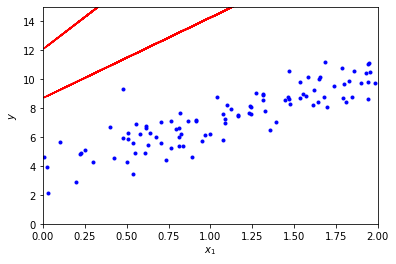

In [47]:
axis([0,2,0,15])
plot(X, y, "b.")
xlabel("$x_1$")
ylabel("$y$")

theta = random.randn(2,1)

n_iteraciones = 10
eta = 0.5

for iteracion in range(n_iteraciones):
    gradientes = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradientes
    
    plot(X, theta[0]*X + theta[1], 'r-')

##### Búsqueda de grilla (*grid search*)

En `scikit-learn` se puede usar una función `GridSearchCV` para buscar los "mejores" valores de los hiperparámetros (por ejemplo, el *learning rate*) por el método de *cross-validation*.

Hay que dar los rangos de parámetros que quieres considerar (la grilla en el espacio de parámetros).

##### El número de iteraciones

Una opción para controlar el número de iteraciones es tener muchas iteraciones pero parar el algoritmo cuando los gradientes son muy pequeños.

La condición sería tener $|\nabla_{\boldsymbol{\theta}}| < \epsilon$ donde $\epsilon$ se llama la tolerancia.

#### Descenso por gradiente estocástico (*stochastic gradient descent*)

En el método de *batch gradient descent* usamos todos los datos de entrenamiento.

El método de *stochastic gradient descent* ocupa solamente una instancia aleatoria del conjunto de datos en cada iteración.

Así es un algoritmo más rápido y permite el uso de conjuntos de datos masivos.

![](figures_entrenamiento/fig4-9.png)

El hecho de que el algoritmo "salta" de un punto a otro significa que puede salir de un mínimo local, pero nunca encuentra el mínimo exacto, sino que un valor cercano.

Se puede aliviar este problema por una reducción gradual en la taza de aprendizaje, durante el proceso (similar al [algoritmo de recocido simulado](https://es.wikipedia.org/wiki/Algoritmo_de_recocido_simulado), *simulated annealing*).

La función que determina el valor de la taza de aprendizaje se llama el *learning schedule*.

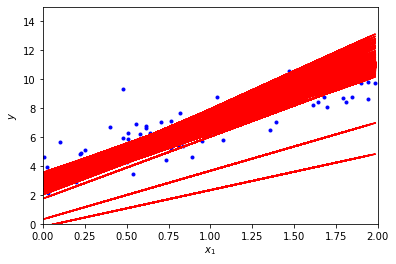

In [48]:
axis([0,2,0,15])
plot(X, y, "b.")
xlabel("$x_1$")
ylabel("$y$")

n_epocas = 50
t0, t1 = 5, 50 #parámetros del learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

theta = random.randn(2, 1)

for epoca in range(n_epocas):
    for i in range(m):
        indice_aleatorio = random.randint(m)
        xi = X_b[indice_aleatorio:indice_aleatorio+1]
        yi = y[indice_aleatorio:indice_aleatorio+1]
        gradientes = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoca * m + i)
        theta = theta - eta * gradientes
        
        plot(X, theta[0]*X + theta[1], 'r-')

In [49]:
theta

array([[3.92517393],
       [3.19499362]])

Para aplicar *stochastic gradient descent* las instancias de entrenamiento tienen que ser **independientes** y **distribuidas identicamente**.

Por esta razón a veces es importante barajar los datos. Por ejemplo, con datos ordenados por etiqueta tendríamos problemas en llegar al mínimo global.

Ahora aplicamos regresión lineal con *stoachstic gradient descent* usando `SGDRegressor`.

En este caso estamos optimizando la función de costo de error cuadrado.

Dos condiciones para terminar el entrenamiento:

1. Después de 1000 épocas. `(max_iter=1000)`
2. La función de costo reduce por menos que $1 \times 10^{-3}$ en una época. `(tol=1e-3)`

Comenzamos con una taza de aprendizaje de $0.1$ `(eta=0.1)` y el *learning schedule* que viene por defecto (distinto a lo que usamos antes).

No usamos regularización: `(penalty=None)`

In [50]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [51]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89692462]), array([3.29345559]))

#### Mini-batch gradient descent

* *Batch gradient descent*: usamos todos los datos de entrenamiento
* *Stochastic gradient descent*: usamos los datos uno por uno

Ahora veremos *mini-batch*: usamos conjuntos pequeños aleatorios de los datos.

Cada conjunto se llama un *mini-batch*.

Una ventaja importante es que las operaciones aritméticas ahora involcran matrices, y los GPUs calculan operaciones matriciales muy rapidamente.

*Mini-batch* es menos errático que *stochastic*: debería llegar más cerca al mínimo global.

Pero, hay más probabilidad de estar atascado en un mínimo local.

![](figures_entrenamiento/fig4-11.png)

![](figures_entrenamiento/fig4-12.png)

### Regresión polinomial

¿Qué hacemos con datos no-lineales? Muchas veces es posible usar un modelo lineal para datos no-lineales.

Una opción es usar potencias de los *features* como *features* nuevos y entrenar un modelo lineal en estos nuevos *features*

Este proceso se llama **regresión polinomial**.

In [52]:
m = 100
X = 6 * random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + random.rand(m, 1)

Text(0, 0.5, '$y$')

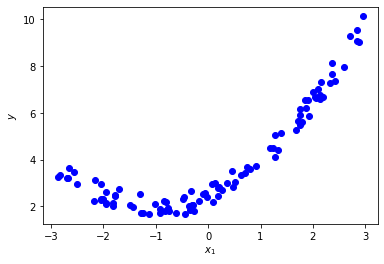

In [53]:
plot(X, y, 'bo')
xlabel("$x_1$")
ylabel("$y$")

Vamos a agregar el cuadrado de cada *feature* en el conjunto de entrenamiento como un *feature* nuevo.

En este caso tenemos solamente $x_1$, así que después de este procesamiento tendremos 2 *features* en vez de $1$.

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.10549612])

In [55]:
X_poly[0]

array([2.10549612, 4.4331139 ])

`X_poly` contiene el *feature* original, más el cuadrado de este *feature*.

Ahora podemos ajustar un modelo de regresión lineal a estos datos.

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.48473951]), array([[1.01681215, 0.49180049]]))

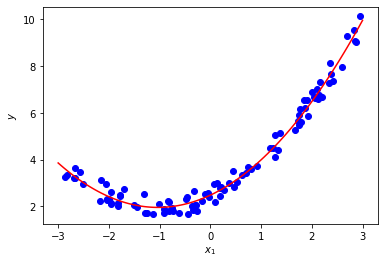

In [57]:
plot(X, y, 'bo')
xlabel("$x_1$")
ylabel("$y$")
x_nuevo = linspace(-3,3,100).reshape(100, 1)
x_nuevo_poly = poly_features.transform(x_nuevo)
plot(x_nuevo, lin_reg.predict(x_nuevo_poly), 'r-')

Según el algoritmo la función es $\hat{y} = 0.485x_1^2 + 1.035x_1 + 2.512$.

La función exacta era $\hat{y} = \frac{1}{2}x_1^2 + x_1 + 2 + \text{ruido}$.

Cuando hay varios *features* se puede encontrar relaciones entre los *features* con regresión polinomial.

Este es porque `PolynomialFeatures` suma todas las combinaciones de *features* hasta el grado elegido.

Por ejemplo, con dos *features* $a$ y $b$, usando `PolynomialFeatures` con `degree=3` tendríamos $a$, $b$, $a^2$, $b^2$, $a^3$, $b^3$, $ab$, $a^2b$, $ab^2$.

`PolynomialFeatures(degree=d)` transforma un array con $n$ *features* a un array con $$\frac{(n+d)!}{d!n!}$$ *features*.

Hay que tener cuidado con la explosión combinatoria...

### Curvas de aprendizaje

Con una función polinomial de grado alto podemos ajustar muy bien a los datos, pero estaríamos cometiendo el error de *overfitting*.

**Ejercicio**: graficar las predicciones de los modelos de regresión polinomial de grado $1$, $2$ y $300$.

---> Book solution in text file

* Si el modelo funciona bien en los datos de entrenamiento, pero no en los datos de validación/prueba $\Rightarrow$ *overfitting*
* Si el modelo no funciona bein en ningun conjunto de datos $\Rightarrow$ *underfitting*

Otra forma de ver el rendimiento de un modelo es con el *learning curve* (curva de aprendizaje).

Esta curva muestra el rendimiento del modelo para varios tamaños de *training sets* (o la iteración de entrenamiento en el caso de aprendizaje *online*).

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    axis([0,80,0.0,3.0])
    plot(sqrt(train_errors), "r-+", linewidth=2, label="train")
    plot(sqrt(val_errors), "b-", linewidth=3, label="val")
    xlabel("Training set size")
    ylabel("RMSE")
    legend()

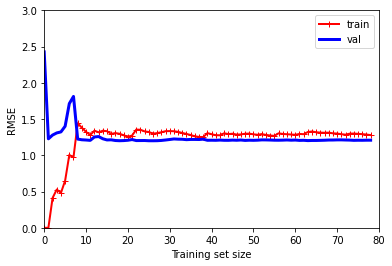

In [59]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

##### Rendimiento en los datos de entrenamiento

* Con uno o dos instancias la curva puede ajustarse perfectamente: la curva comienza en cero.
* Con más instancias el modelo no puede ser perfecto, así que el error aumenta hasta un valor casi constante.

##### Rendiemiento en los datos de validación

* Un modelo entrenado en pocas instancias no generaliza bien: error grande en validación al principio.
* Con más instancias el modelo generaliza mejor, pero solamente hasta un límite.

-> Este es un buen ejemplo de un modelo con *underfitting*: ambas curvas están planas, cercanas y altas.

Ahora vamos a usar un polinomio de grado 10...

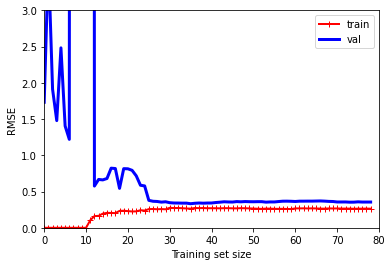

In [60]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

* El error es mucho menor comparado con el modelo de regresión lineal.
* Hay un espacio entre las curvas: el modelo tiene mejor ajuste en los datos de entrenamiento que en los datos de validación.

-> El espacio indica un modelo con *overfitting*.

### Bias/variance tradeoff

El error de generalización es la suma de 3 errores muy diferentes:

#### Bias (prejuicio)

* Suposiciones incorrectas, por ejemplo, suponiendo datos lineales cuando son cuadraticos.
* Un modelo con *bias* alto -> *underfitting*

#### Varianza

* Sensibilidad excesiva a variaciones pequeñas en los datos de entrenamiento.
* Un modelo con muchos grados de libertad probablemente tendrá varianza alta -> *overfitting*

#### Error irreducible

* Ruido intrinsico de los datos.
* La única manera de mejorar este error es con mejores datos.

Aumentando la complejidad de un modelo típicamente aumentará la varianza y reducirá el *bias*.

Reduciendo la complejidad de un modelo aumentará el *bias* y reducirá la varianza.

## Modelos lineales regularizados

Regularización es una manera de reducir el problema de *overfitting*.

En un modelo lineal podemos regularizar usando restricciones en los **pesos** (*weights*).

##### Regresión ridge (regresión contraída, regularización de Tikhonov)

Un término de regularización $\alpha \sum_{i=1}^n \theta_i^2$ está sumado a la función de costo:

$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \frac{1}{2}\sum_{i=1}^n \theta_i^2$$

El término de *bias* no está regularizado (la suma comienza en $i=1$).

Así forzamos que los pesos (los valores de $\theta_i$) sean lo más pequeño posible.

Se usa el término de regularización solamente en el entrenamiento del modelo. Validamos el modelo con la función de costo sin regularización.

El hiperparámetro $\alpha$ determina el nivel de regularización:

* $\alpha = 0$: regresión lineal normal
* $\alpha \to \infty$: línea plana que pasa por el promedio de los datos.

Definimos el vector de *feature weights*:

$$\boldsymbol{w} \equiv (\theta_1,\ldots,\theta_n)$$

El término de regularización es igual a $\frac{1}{2}(|| \boldsymbol{w} ||_2)^2$, donde $|| \boldsymbol{w} ||_2$ significa la norma $\mathscr{l}_2$.

Para descenso por gradiente, podemos incluir la regularización usando $\nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) + \alpha \boldsymbol{w}$ 

La norma $\mathscr{l}_k$ de un vector $\boldsymbol{v}$ se define como:

$$|| \boldsymbol{v} ||_k = (|v_0|^k + |v_1|^k + \cdots + |v_n|^k)^{1/k}$$

La contribución de valores mayores a la norma aumenta con $k$ mayor.

**Importante**: regresión ridge está sensible a la escala de los *features*, así que es importante escalar los datos (e.g. `StandardScaler`)

Se puede implementar regresión ridge analíticamente:

$$\hat{\boldsymbol{\theta}} = \left( \boldsymbol{X}^T \boldsymbol{X} + \alpha \boldsymbol{A} \right)^{-1} \boldsymbol{X}^T \boldsymbol{y}$$

o con descenso por gradiente, como lo que vimos con regresión lineal normal.

Ahora aplicamos regresión ridge usando la ecuación analítica (la matriz está invertida por el [método de Cholesky](https://es.wikipedia.org/wiki/Factorizaci%C3%B3n_de_Cholesky)).

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

Ahora con descenso por gradiente.

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

El hiperparámetro `penalty` indica el tipo de regularización que queremos usar. `"l2"` significa que queremos sumar un término a la función de costo igual a la norma $\mathscr{l}_2$ (multiplicado por $1/2$).

Este es precisamente regresión ridge.

In [ ]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

##### Regresión lasso (least absolute shrinkage and selection operator)

Muy similar a regresión ridge, pero sumamos la norma $\mathscr{l}_1$ a la función de costo.

$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum_{i=1}^n |\theta_i|$$

Regresión lasso tiende a eliminar los pesos de los *features* menos importantes $\rightarrow$ selección de *features*.

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

![](figures_entrenamiento/fig4-19.png)

**Izquierda, arriba:** los contornos elipticas representan una función de costo tipo MSE sin regularización. Los diamantes la "multa" $\mathscr{l}_1$.

Circulos blancos: camino de *batch gradient descent* con la función de costo normal.

Triangulos amarillos: camino de *batch gradient descent* con la multa solamente. Este camino primero llega a $\theta_1 = 0$ y después llega a $\theta_2 = 0$.

**Derecha, arriba:** los contornos elipticas representan la función de costo tipo MSE más regularización de $\mathscr{l}_1$, con $\alpha = 0.5$.

Circulos blancos: camino de *batch gradient descent* con la función de costo normal.

Pregunta: ¿por qué los circulos blancos oscilan alrededor de $\theta_2 = 0$ cuando se acercan al mínimo?

**Graficos abajo**: lo mismo, con $\mathscr{l}_2$. El mínimo sin regularización es más cerca al mínimo con regularización, y ningún *feature* está eliminado.

La función de costo de regresión lasso no es diferenciable en $\theta_i = 0$.

Para aplicar descenso por gradiente en este caso, podemos usar:

$$g(\boldsymbol{\theta},J) = \nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) + \alpha \begin{pmatrix} \text{sgn}(\theta_1) \\ \text{sgn}(\theta_2) \\ \vdots \\ \text{sgn}(\theta_n) \end{pmatrix}$$

donde $$\text{sgn}(\theta_i) = \begin{cases} -1 & \theta_i < 0 \\ 0 & \theta_i = 0 \\ +1 & \theta_i > 0 \end{cases}$$

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

##### Elastic Net

Una mezcla entre ridge y lasso:

$$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r\alpha \sum_{i=1}^n |\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^n \theta_i^2$$

Con $r=0$ tenemos regresión ridge, y con $r=1$ tenemos regresión lasso.

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio = r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

##### Parada temprana (early stopping)

Otra forma muy diferent de regularizar un método iterativo es con *early stopping*: paramos el algoritmo cuando el error de validación llegue a un mínimo.

| ![](figures_entrenamiento/fig4-20.png) |
|----------------------------------------|
| Regresión polinomial de grado alto, *batch gradient descent* |


In [ ]:
from sklearn.base import clone

#preparar los datos
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", 
                       eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #comienza donde terminó
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

### Regresión logística

Se puede usar regresión logística para clasificación.

El método puede estimar la probabilidad que una instancia pertenece a una clase particular.

Si la probabilidad es mayor que 50% decimos que pertenece a la clase. Por lo tanto, es un **clasificador binario**.

La probabilidad estimada es:

$$\hat{p} = h_{\boldsymbol{\theta}}(\boldsymbol{x}) = \sigma \left( \boldsymbol{x}^T \boldsymbol{\theta} \right)$$

La función **logística** (o sigmoide) está dada por:

$$\sigma(t) = \frac{1}{1+e^{-t}}$$

**Ejercicio**: graficar la función logística.

Predicción del modelo:

$$\hat{y} = \begin{cases} 0 & \hat{p} < 0.5 \\ 1 & \hat{p} \geq 0.5 \end{cases}$$

Notar que $\sigma(t) < 0.5$ cuando $t < 0$ y $\sigma(t) \geq 0.5$ cuando $t \geq 0$, así que predice $1$ si $\boldsymbol{x}^T \boldsymbol{\theta}$ es positivo, y $0$ si es negativo.

##### Función de costo por instancia

Queremos tener $\boldsymbol{\theta}$ tal que el modelo estima probabilidades altas para instancias positivas, y probabilidades bajas para instancias negativas.

$$c(\boldsymbol{\theta}) = \begin{cases} -\log(\hat{p}) & y = 1 \\ -\log(1-\hat{p}) & y = 0 \end{cases}$$

El costo será muy grande si $\hat{p} \to 0$ para una instancia positiva, y también si $\hat{p} \to 1$ para una instancia negativa.

El costo será muy cerca a cero si $\hat{p} \to 1$ para una instancia positiva, y también si $\hat{p} \to 0$ para una instancia negativa.

##### Función de costo total

La función de costo para todo el conjunto de entrenamiento es simplemente el promedio de la función de costo por instancia sobre todas las instancias:

$$J(\boldsymbol{\theta}) = -\frac{1}{m}\sum_{i=1}^m \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)}) \right]$$

No hay ninguna ecuación analítica (conocida) que da el valor de $\boldsymbol{\theta}$ que minimiza esta función de costo!

La función es convexa $\rightarrow$ podemos aplicar descenso por gradiente (u otro algoritmo de optimización).

$$\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^m \left( \sigma(\boldsymbol{\theta}^T\boldsymbol{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

Aqui tenemos el error de predicción multiplicado por el valor del *feature* $j$, promediado sobre todas las instancias. Es muy similar al gradiente de la función de costo en regresión lineal.

#### Límites de decision (*decision boundaries*)

Vamos a ilustrar el uso de regresión logística con un *dataset* muy usado en *machine learning*: observaciones de las flores **iris**.

![](figures_entrenamiento/fig4-22.png)

Intentaremos construir un clasificador basado solamente en el *feature* de *petal width* (ancho de pétalo).

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [6]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int32)

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

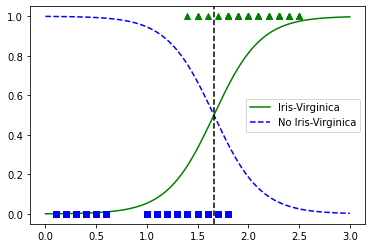

In [49]:
X_new = linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plot(X_new, y_proba[:, 0], "b--", label="No Iris-Virginica")
plot(X[y == 1], ones_like(X[y == 1]), "g^")
plot(X[y == 0], zeros_like(X[y == 0]), "bs")
axvline(x=X_new[np.abs(y_proba[:,1] - 0.5).argmin()], color='k', ls='--')
legend()

In [50]:
X_new[np.abs(y_proba[:,1] - 0.5).argmin()]

array([1.66066066])

En el punto donde las probabilidades son igual a 50% (~ 1.66cm) tenemos un **límite de decisión** (*decision boundary*).

Para un valor de ancho de pétalo mayor que ese valor es más probable que sea un Iris-Virginica.

In [51]:
# Ahora usando el método "predict" para clasificar
# Arriba usamos "predict_proba" para obtener la probabilidad
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int32)

En el caso de usar dos *features* el modelo llega a una clasificación según un límite de decisión unidimensional (es decir, una línea, en vez de un punto como lo que tenemos arriba).

![](figures_entrenamiento/fig4-24.png)

El límite de decisión matematicamente corresponde al conjunto de puntos $\boldsymbol{x}$ en el espacio de *features* que satisface:

$$\boldsymbol{\theta}^T \boldsymbol{x} = \theta_0 + \theta_1x_1 + \theta_2x_2 = 0$$

Esta ecuación define una línea recta.

Se puede regularizar un modelo de regresión logística con multas de $\mathscr{l}_1$ o $\mathscr{l}_2$. 

`Scikit-Learn` agrega la norma $\mathscr{l}_2$ a la función de costo por defecto.

El hiperparámetro que determina la regularización en `LogisticRegression` se llama `C`, y es la **inversa** de `alpha`. Así que, con mayor `C`, menos regularización.

### Regresión Softmax

Se puede generalizar el modelo de regresión logística al caso de tener multiples clases. Este modelo se llama **regresión softmax**.

Para una instancia, el modelo calcula un puntaje $s_k(\boldsymbol{x})$ para cada clase $k$.

Después, estima la probabilidad de cada clase aplicando la función softmax (exponencial normalizada) a los puntajes.

$$s_k(\boldsymbol{x}) = \boldsymbol{x}^T \boldsymbol{\theta}^{(k)}$$

En este modelo, cada clase tiene su propio vector de parámetros $\boldsymbol{\theta}^{(k)}$.

Se puede combinar todos los $\boldsymbol{\theta}^{(k)}$ como las filas de una matriz de parámetros $\boldsymbol{\Theta}$.

Las probabilidades para cada clase están dadas por:

$$\hat{p}_k = \sigma(\boldsymbol{s}(\boldsymbol{x}))_k = \frac{\exp(s_k(\boldsymbol{x}))}{\sum_{i=1}^K \exp(s_j(\boldsymbol{x}))}$$

* $K$ es el número de clases.
* $\boldsymbol{s}(\boldsymbol{x})$ es un vector de puntajes de todas las clases para la instancia $\boldsymbol{x}$.
* $\sigma(\boldsymbol{s}(\boldsymbol{x}))_k$ es la probabilidad estimada que la instancia $\boldsymbol{x}$ pertenece a la clase $k$.

La clase predicha es simplemente la clase con la probabilidad estimada mayor:

$$\hat{y} = \underset{k}{\text{argmax}}\; \sigma(\boldsymbol{s}(\boldsymbol{x}))_k = \underset{k}{\text{argmax}}\; s_k(\boldsymbol{x}) = \underset{k}{\text{argmax}} \left( (\boldsymbol{\theta}^{(k)})^T \boldsymbol{x} \right)$$

La función argmax nos da el valor de una variable que maximiza una función. En esta ecuación, nos da el valor de $k$ que maximiza la probabilidad $\sigma(\boldsymbol{s}(\boldsymbol{x}))_k$

Notar: regresión logística predice **una** clase (no es *multioutput*) así que se puede usar cuando las clases son mutuamente exclusivas.

##### Función de costo: entropía cruzada (cross entropy)

La entropía cruzada es un concepto que viene de la **teoría de la información**.

Es una medida de la diferencia entre dos distribuciones de probabilidad para una variable aleatoria dada.

**Información**: el número de bits necesario para comunicar un evento.

* Un evento con menos probabilidad tiene más información.
* Un evento con más probabilidad tiene menos información.

Un evento menos probable es un evento más sorprendente, y contiene más información.

La información de un evento se puede cuantificar como $$h(x) = -\log(p(x))$$ donde $p(x)$ es la probabilidad del evento.

**Entropía de información**: el nivel promedio de información inherente a los posibles resultados de una variable aleatoria $X$.

$$H(X) = \langle h(x) \rangle = -\sum_{i=1}^n p(x_i) \log p(x_i)$$

**Entropía cruzada**: el número promedio de bits necesario para comunicar eventos que vienen de una distribución $p$ cuando usamos la distribución $q$.

$$H(p,q) = -\sum_{i=1}^n p(x_i) \log q(x_i)$$

Esta función expresa el número de bits extra que hay que usar para representar un evento usando la distribución $q$ en vez de la distribución correcta $p$.

Está relacionado con la diferencia entre dos distribuciones $p$ y $q$, que se puede cuantificar con la **divergencia de Kullback-Leibler**.

Para el método de regresión softmax, usamos:

$$J(\boldsymbol{\Theta}) = H(y,p) = -\frac{1}{m}\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log \left( \hat{p}_k^{(i)} \right)$$

$y_k^{(i)}$ es la probabilidad verdadera que la instancia $i$ pertenece a la clase $k$ (típicamente igual a 0 o 1).

En el caso de dos clases (clasificación binaria) esta función de costo es equivalente a lo que usamos para regresión logística.

El gradiente de la función de costo para cada clase $k$ está dado por

$$\nabla_{\boldsymbol{\theta}^{(k)}}J(\boldsymbol{\Theta}) = \frac{1}{m} \sum_{i=1}^m \left( \hat{p}_k^{(i)} - y_k^{(i)} \right)\boldsymbol{x}^{(i)}$$

##### Regresión softmax en Scikit-Learn

Ahora vamos a usar `LogisticRegression` para clasificar las flores en las $3$ clases posibles.

Por defecto, con más que $2$ clases, `LogisticRegression` ocupa *one-versus-all* (varios clasificadores binarios).

Elegimos `multi_class="multinomial"` para cambiar a regresión softmax.

Hay que especificar un *solver* que funciona con regresión softmax, como `lbfgs` ([wikipedia](https://es.wikipedia.org/wiki/L-BFGS)). Este aplica regularización $\mathscr{l}_2$ por defecto, controlado por el hiperparámetro `C`.

In [ ]:
X = iris["data"][:, (2, 3)] #longitud y ancho de los pétalos
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", 
                                 solver="lbfgs", C=10)
softmax_reg.fit(X, y)

In [ ]:
# ¿Cuál clase predecimos para un iris con pétalos 
# de longitud 5cm, ancho 2cm?
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

En el punto donde los $3$ límites de decisión coinciden, la probabilidad de cada clase es igual a 33%...